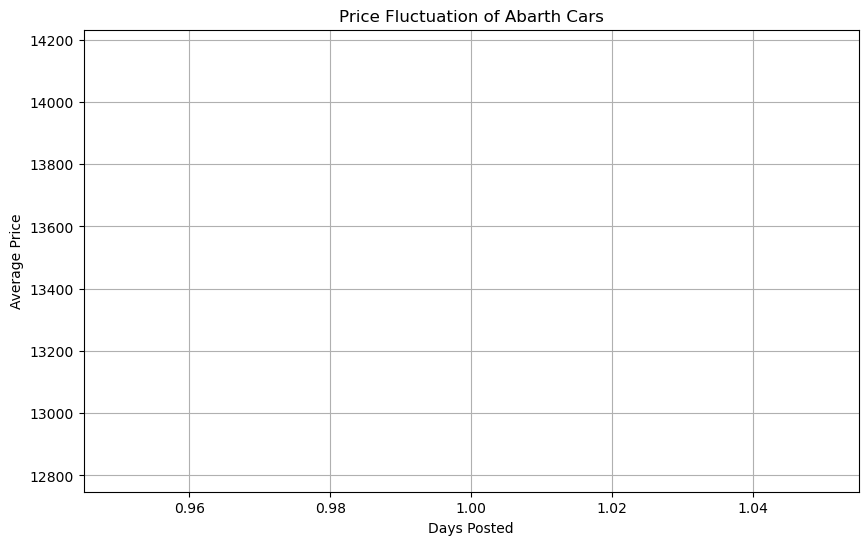

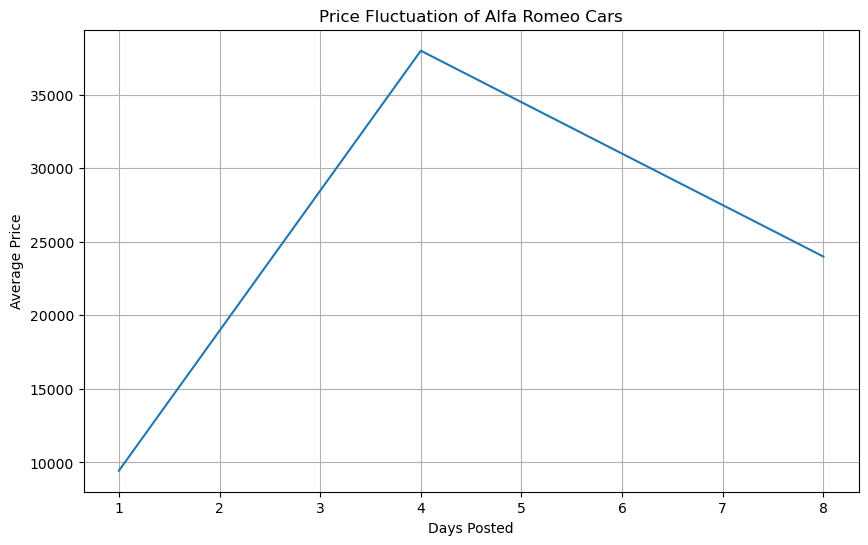

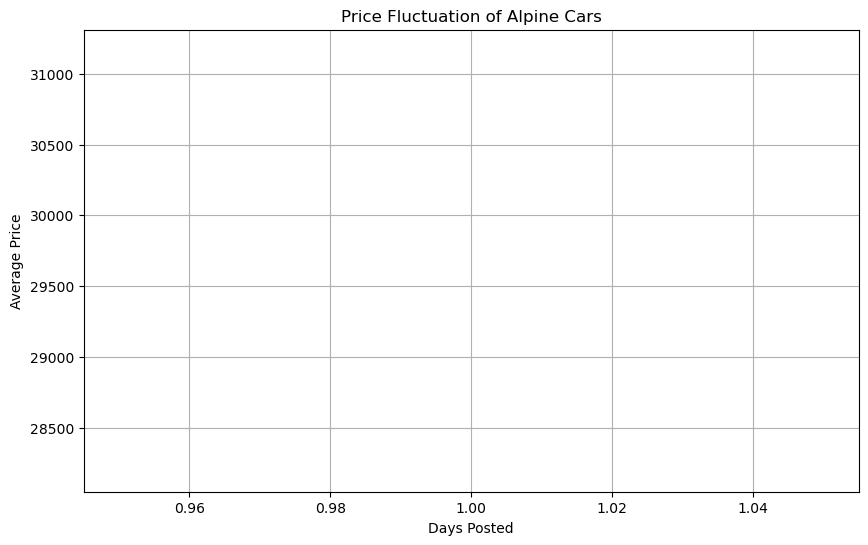

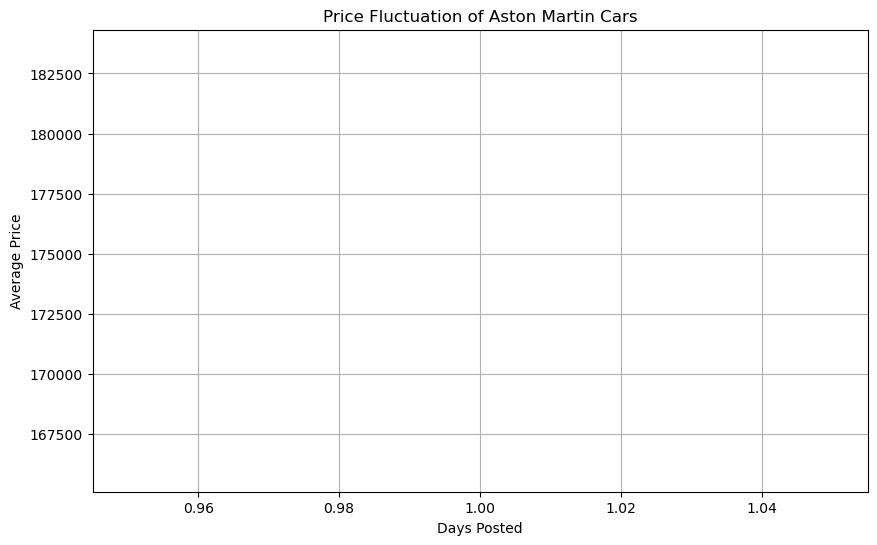

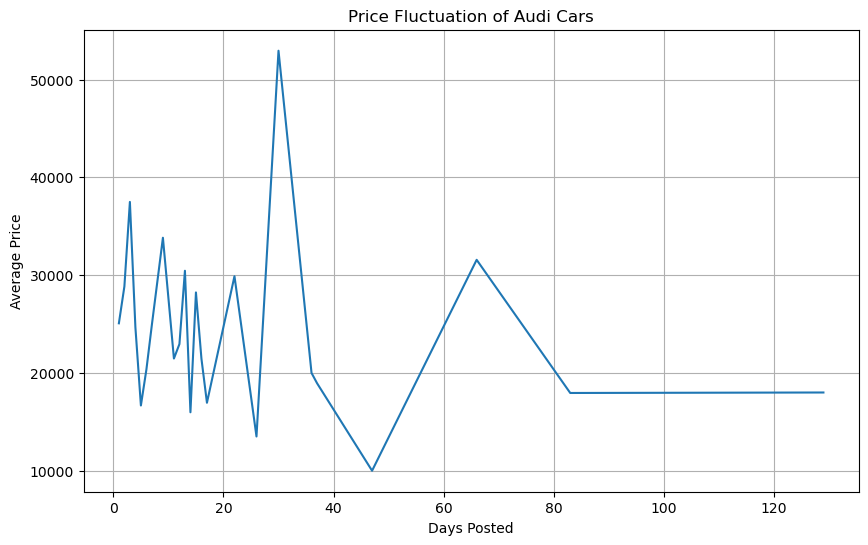

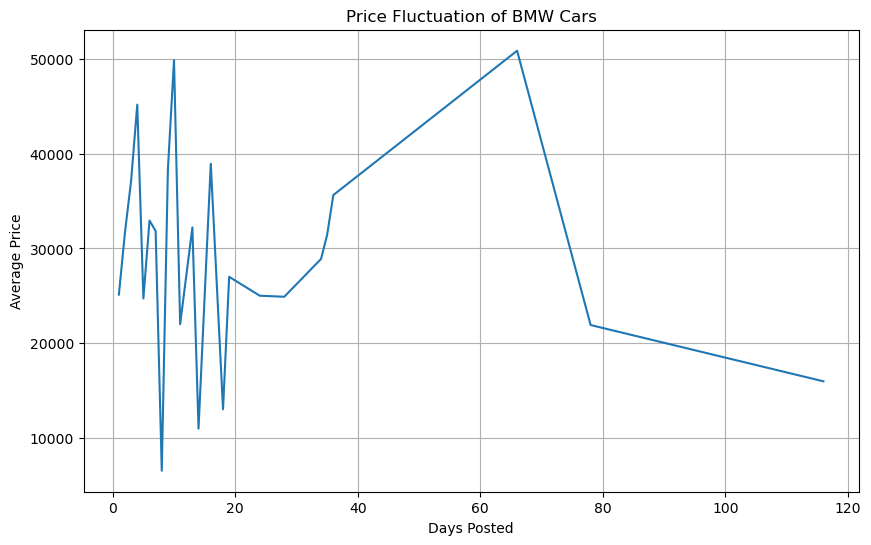

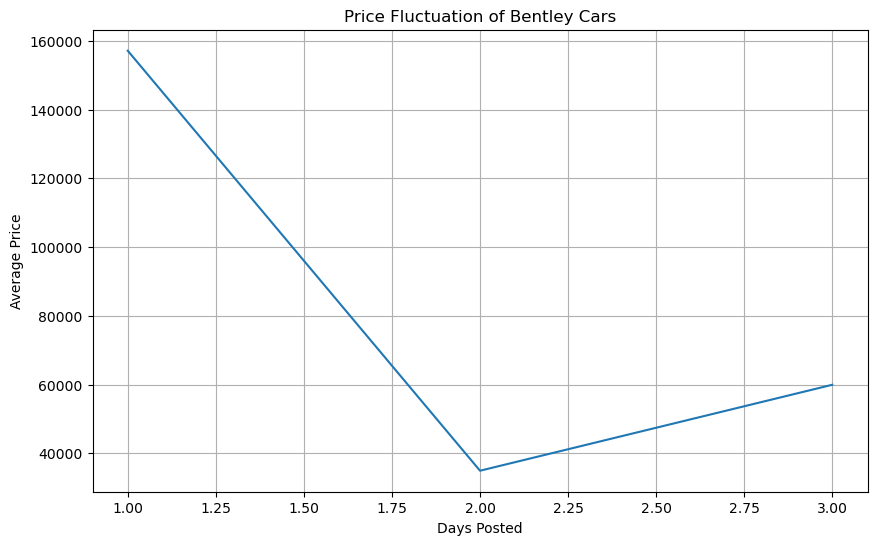

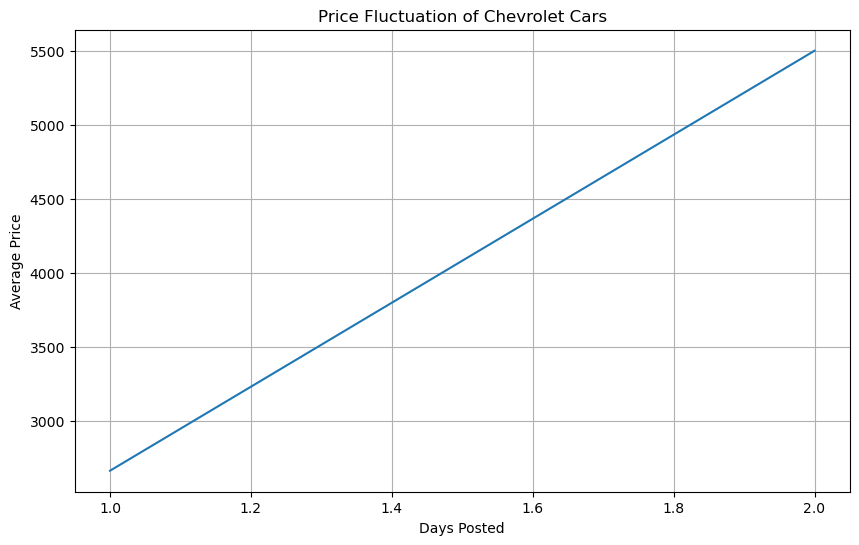

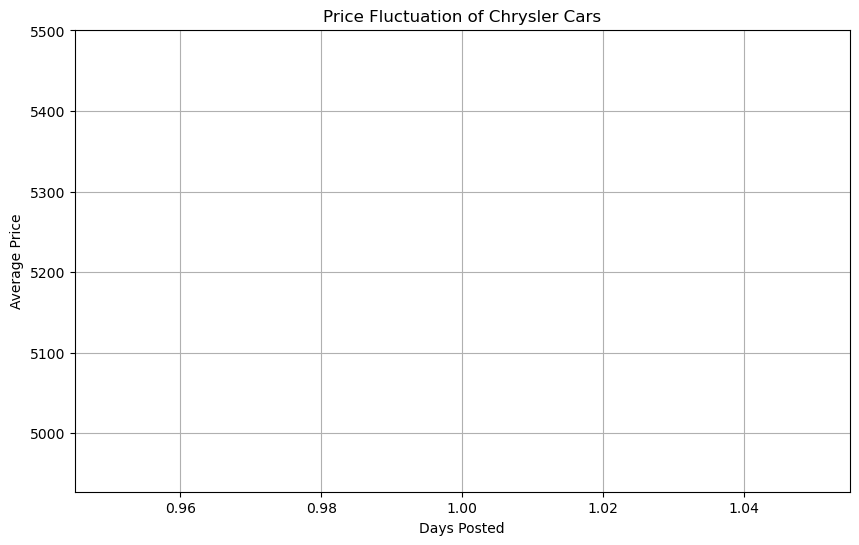

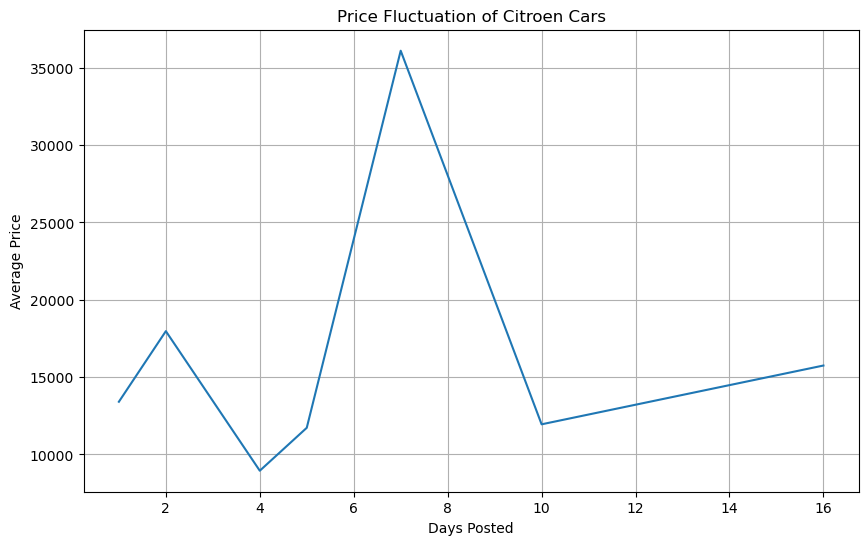

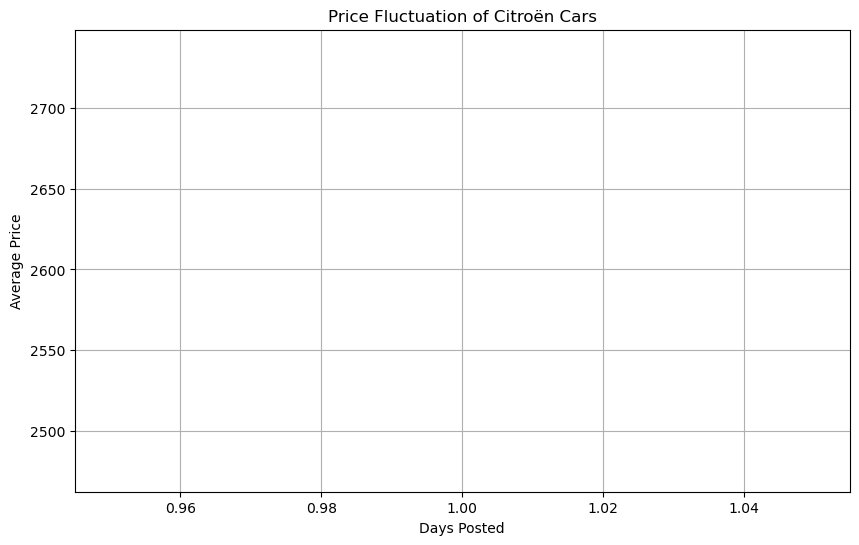

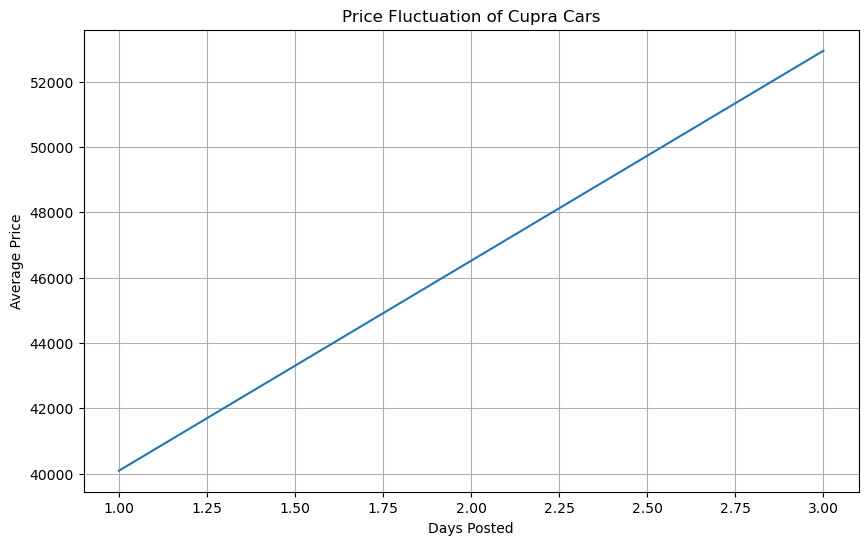

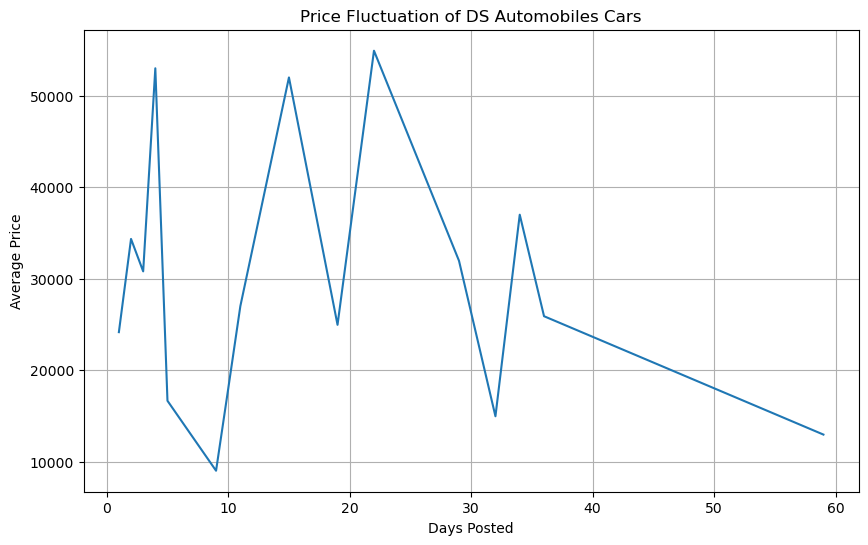

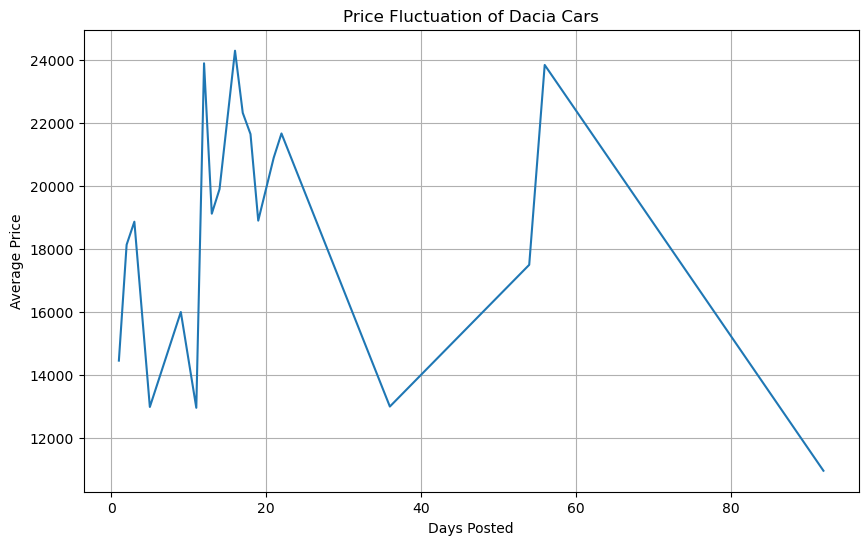

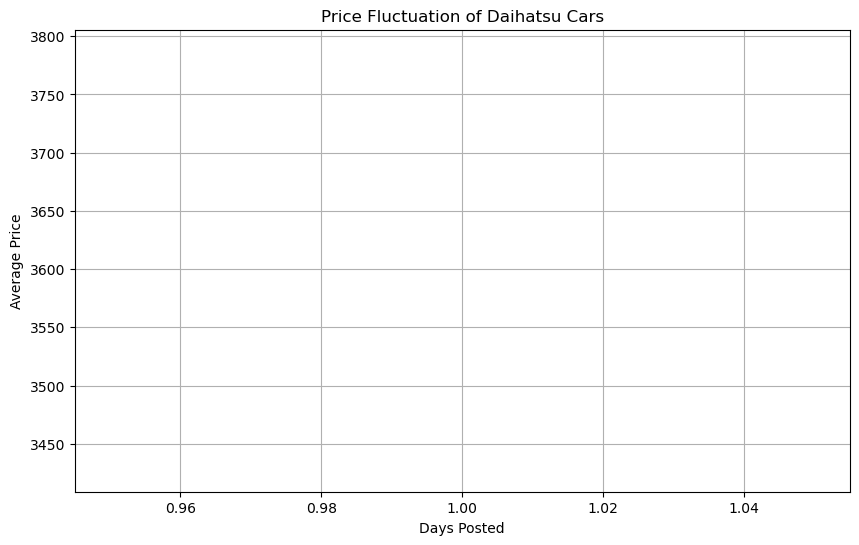

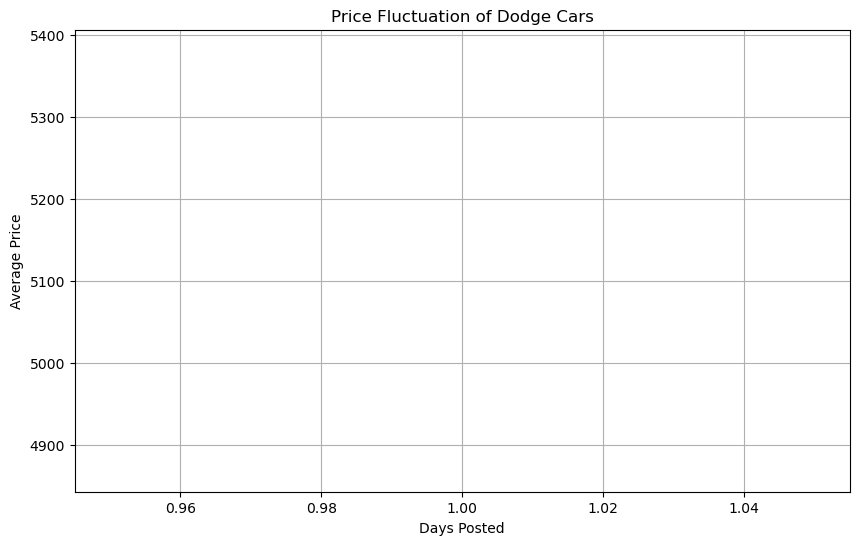

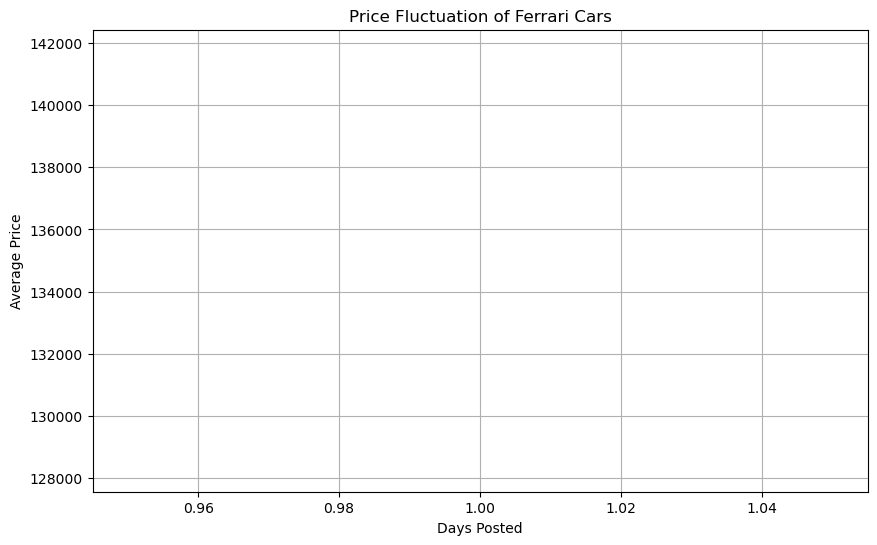

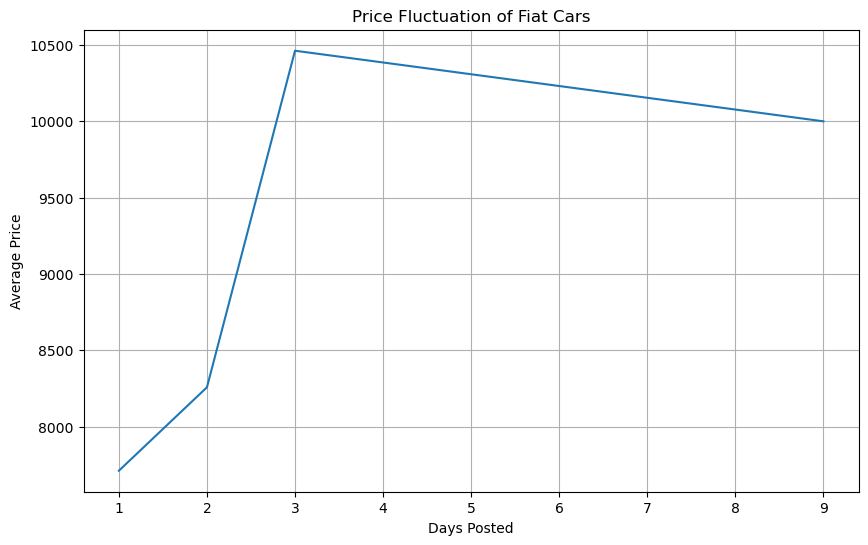

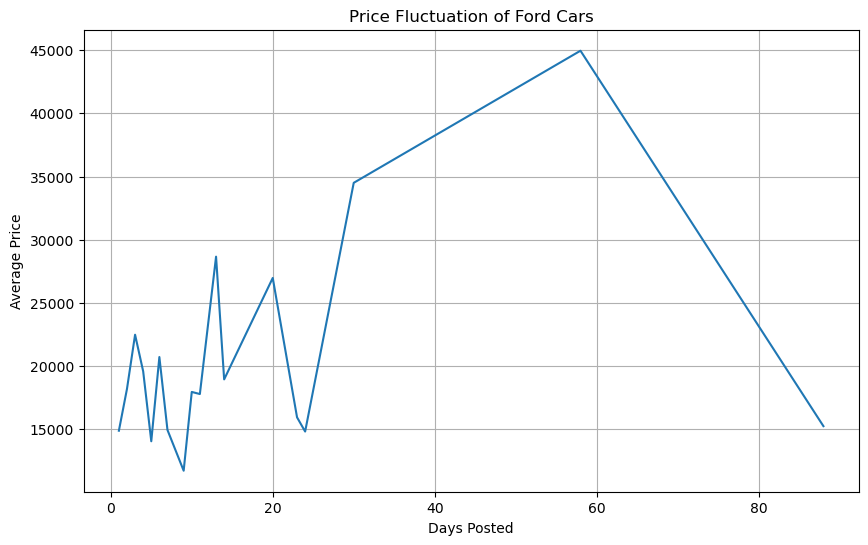

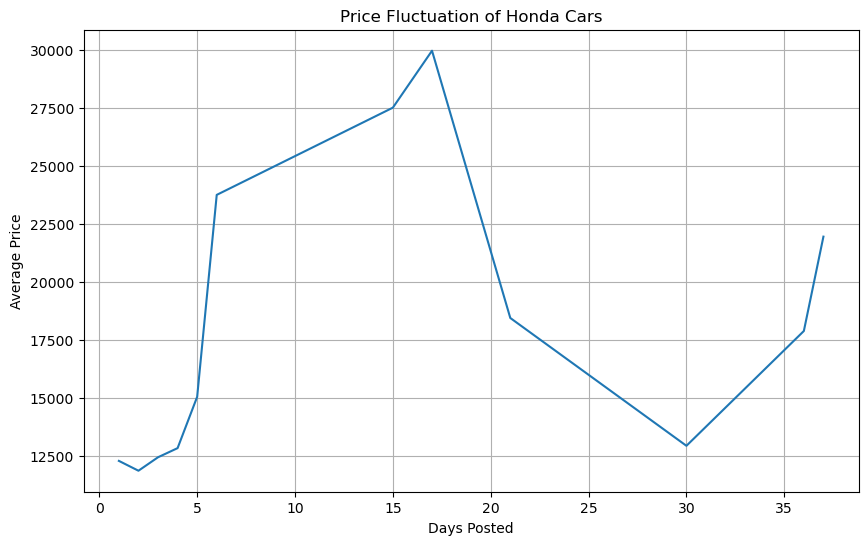

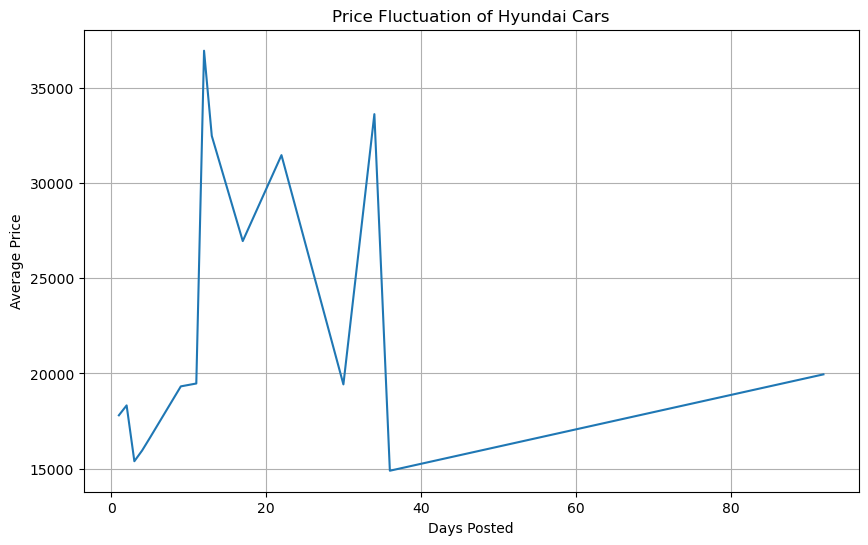

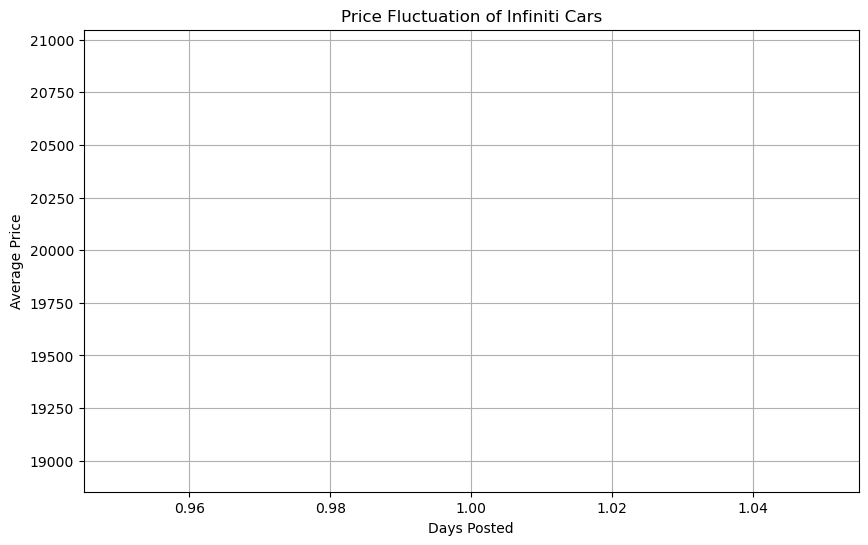

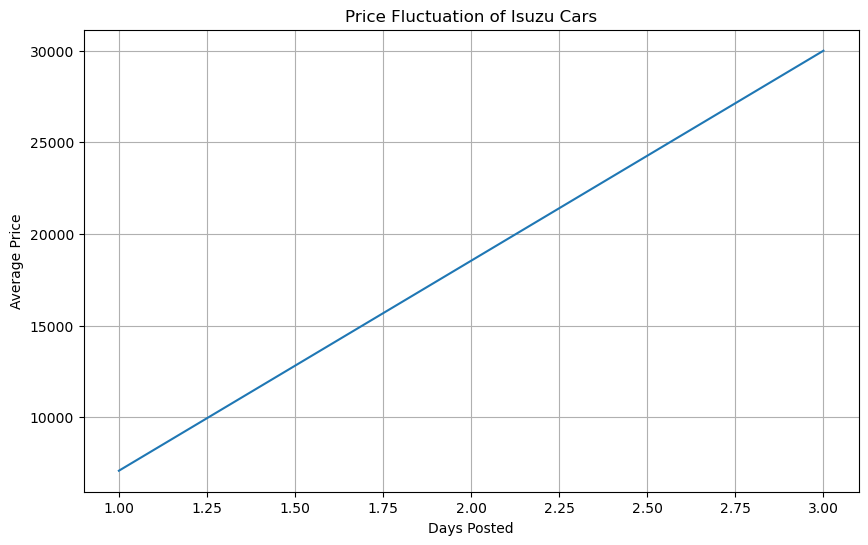

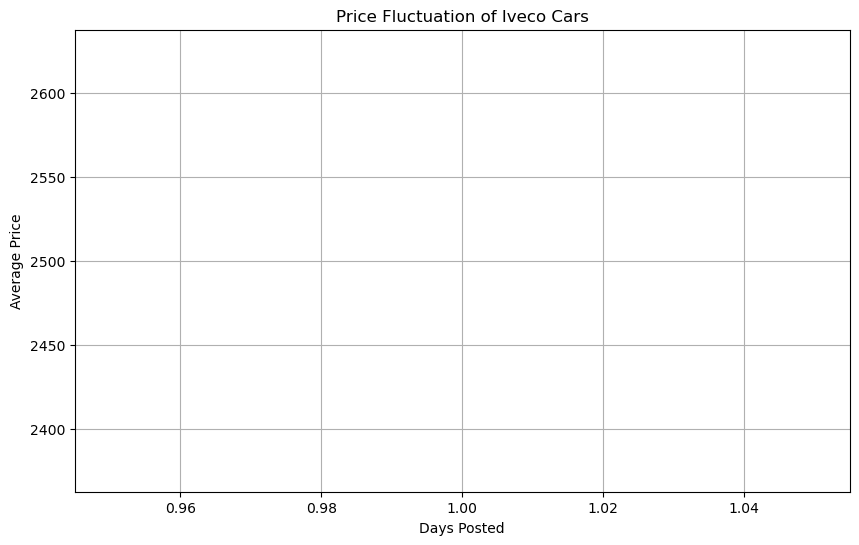

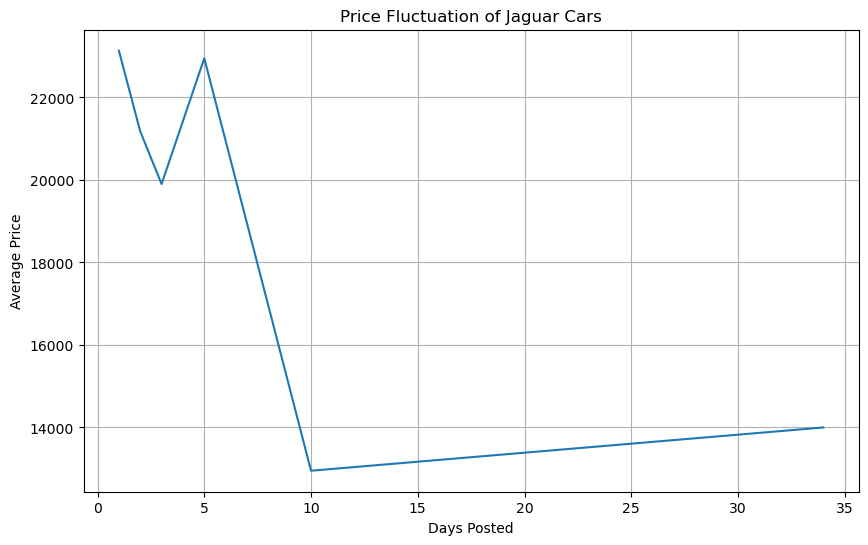

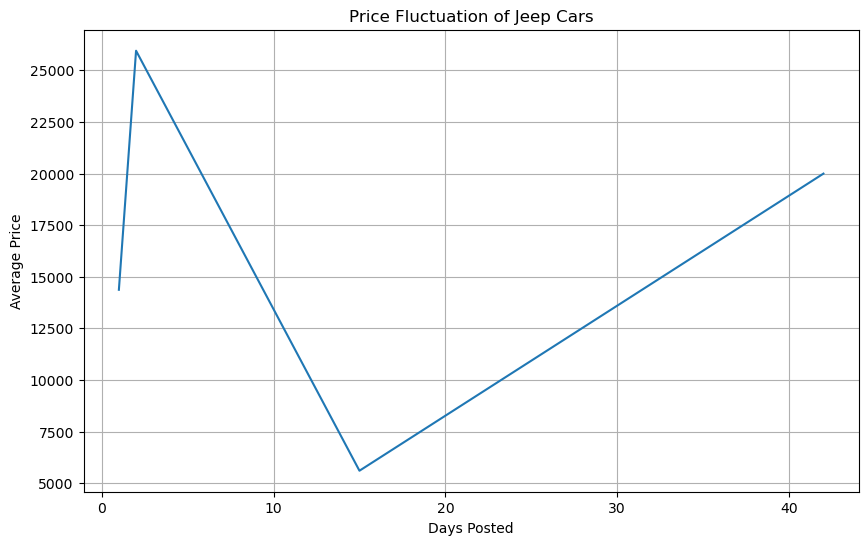

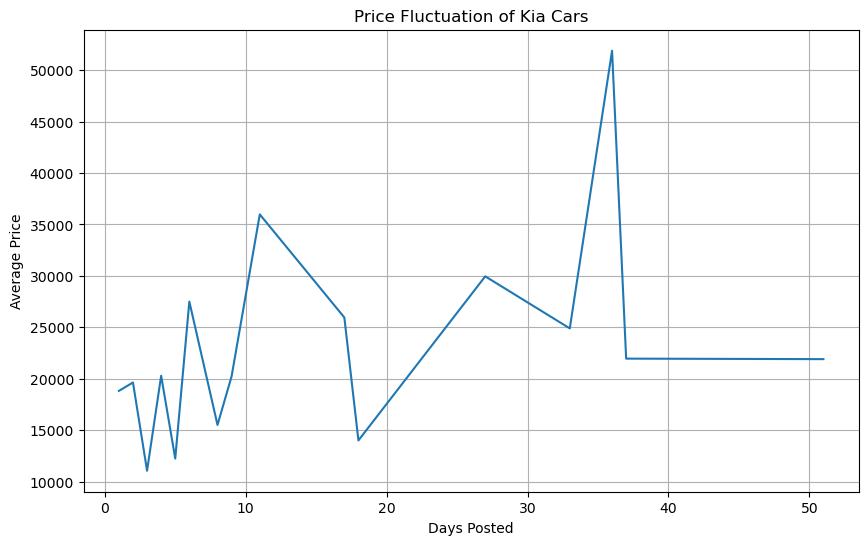

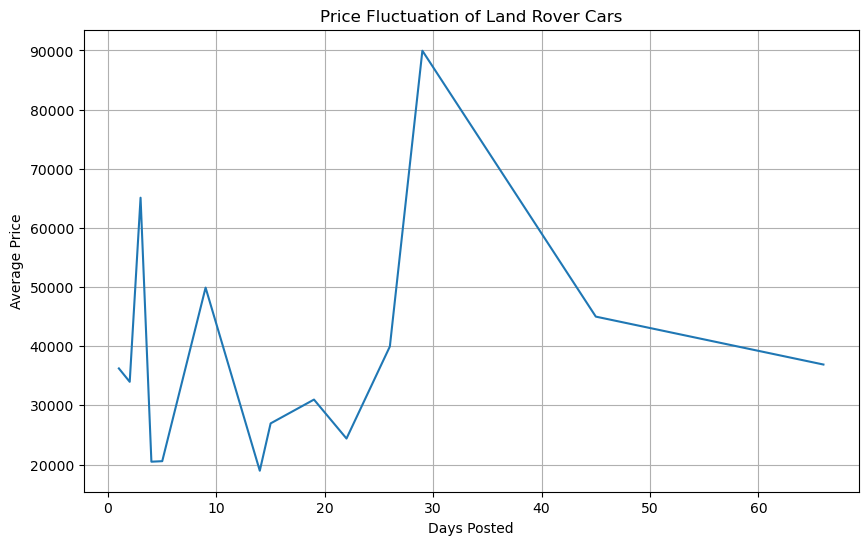

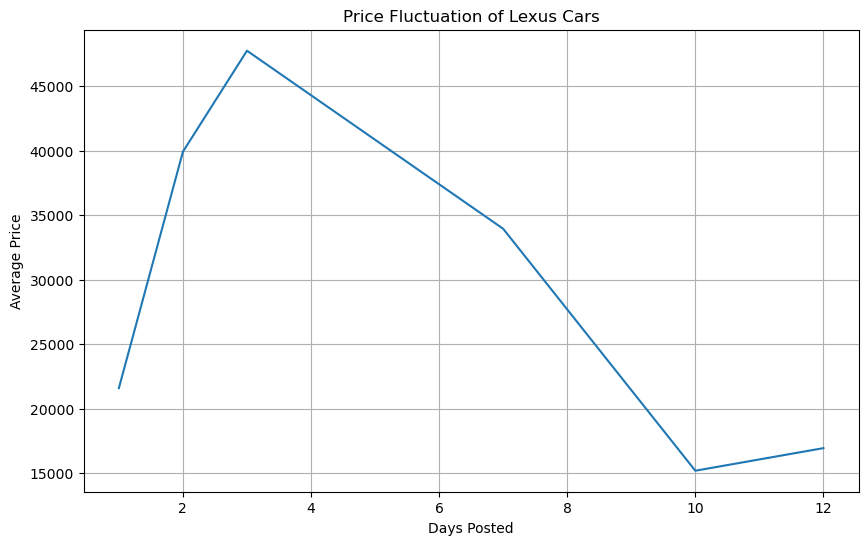

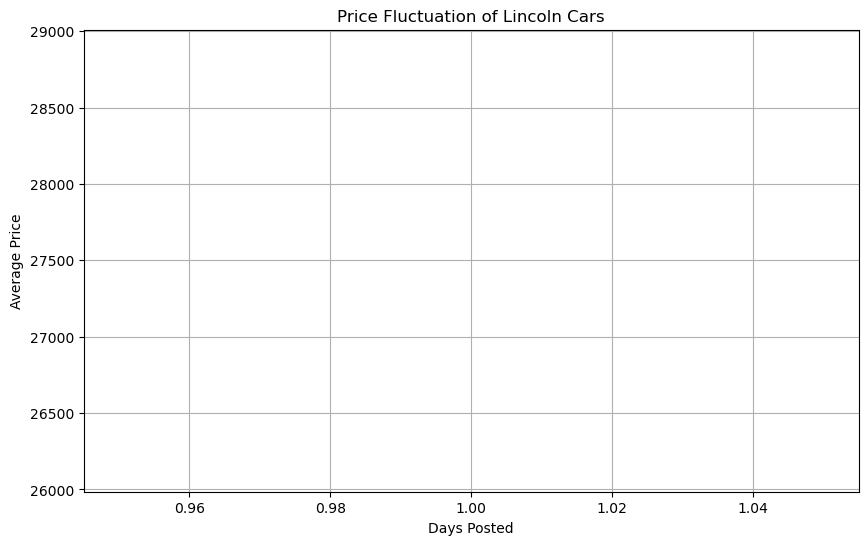

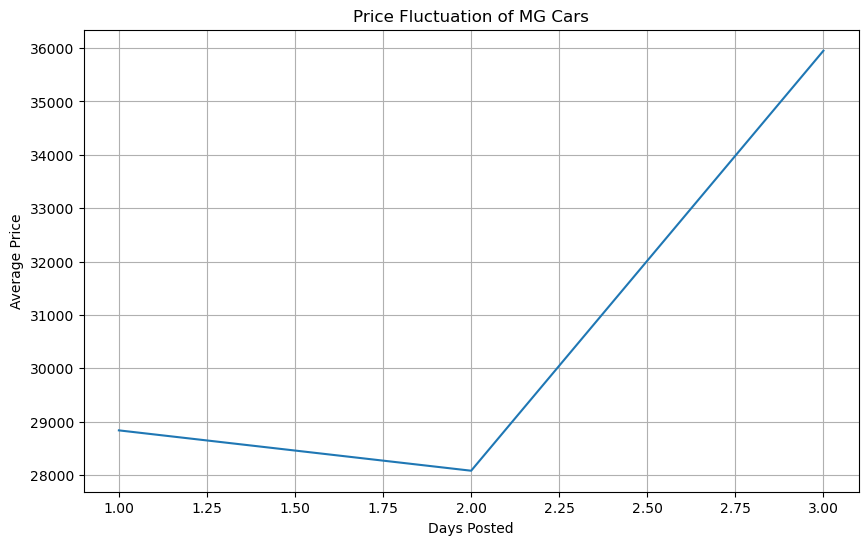

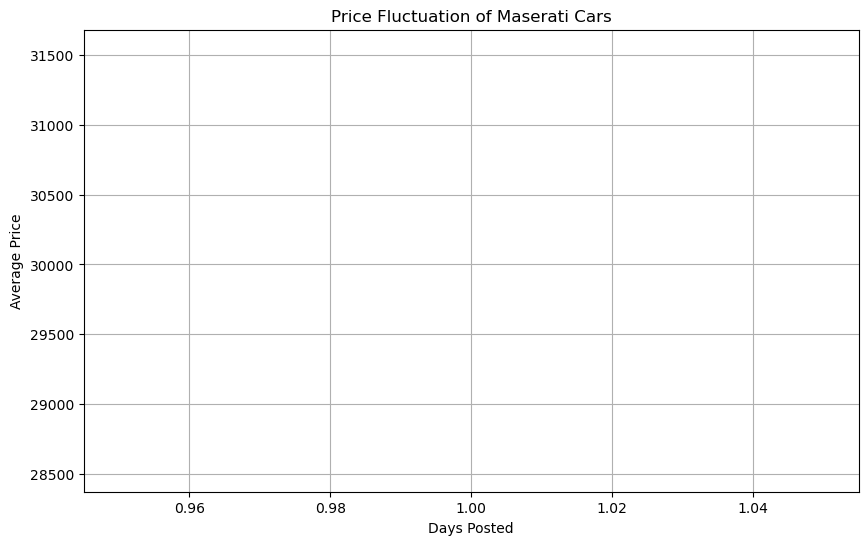

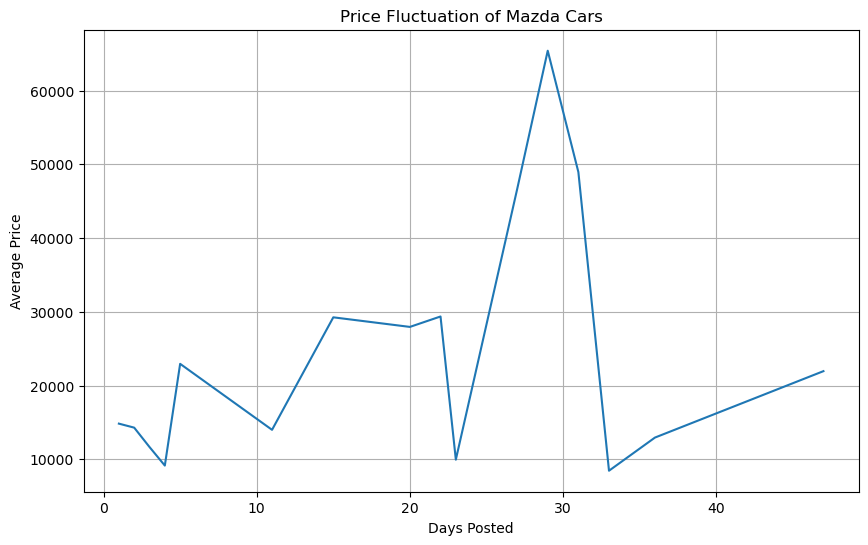

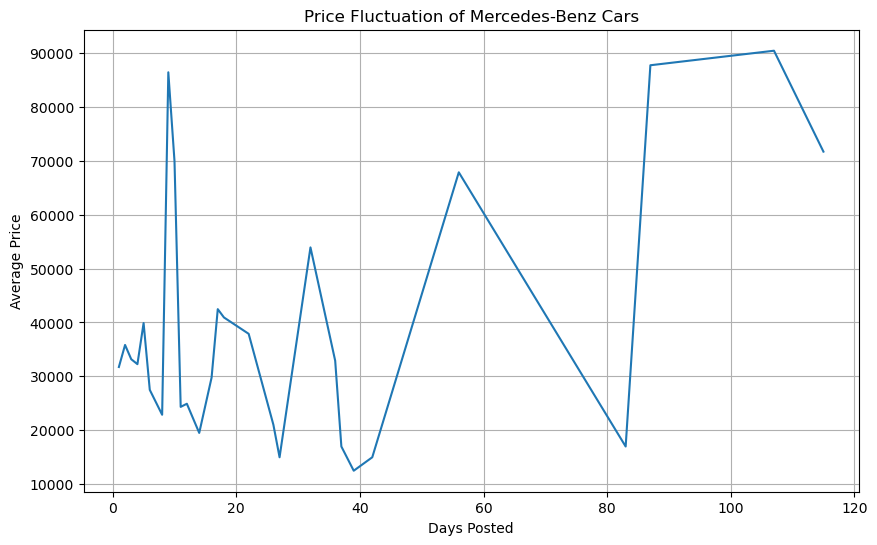

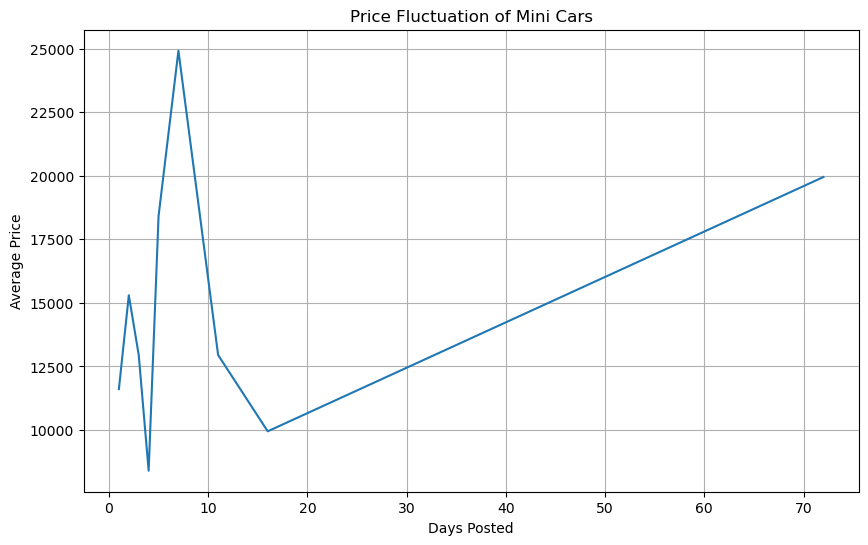

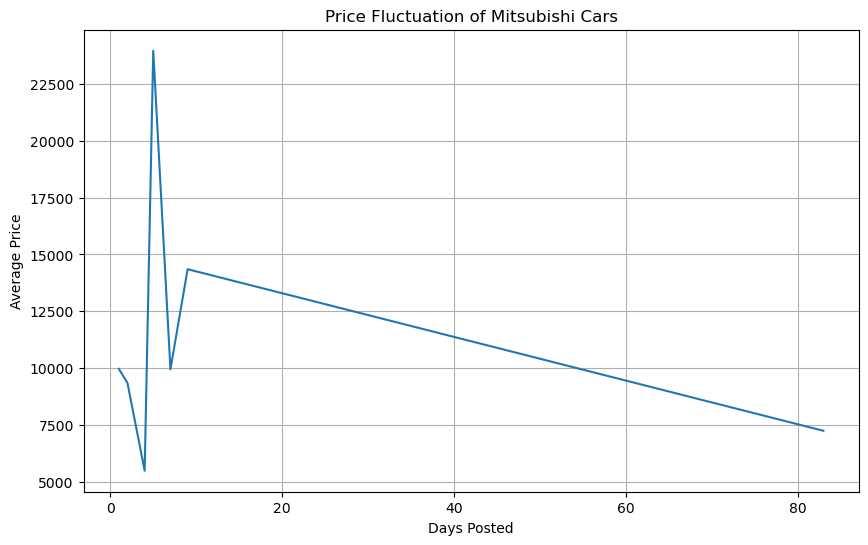

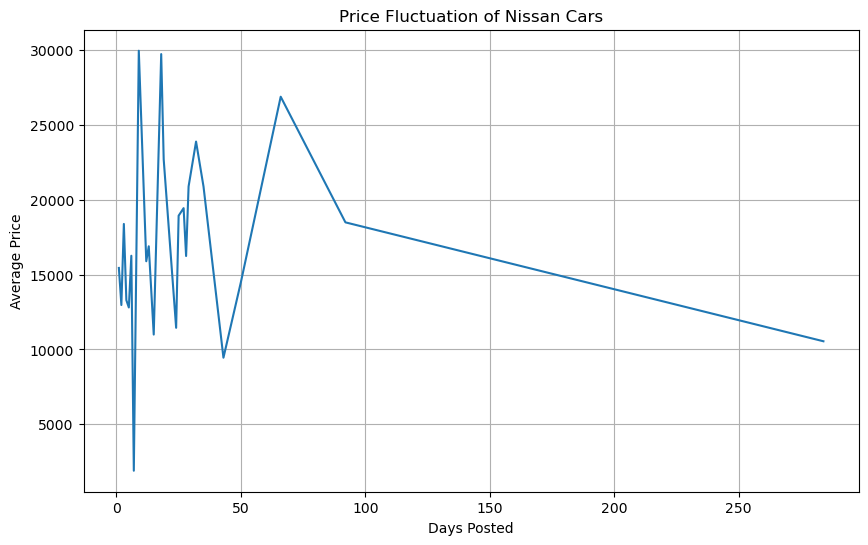

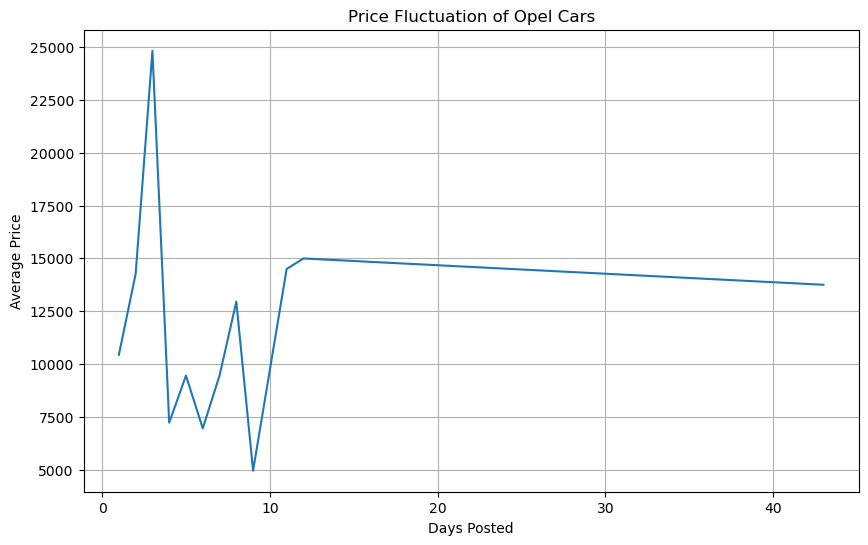

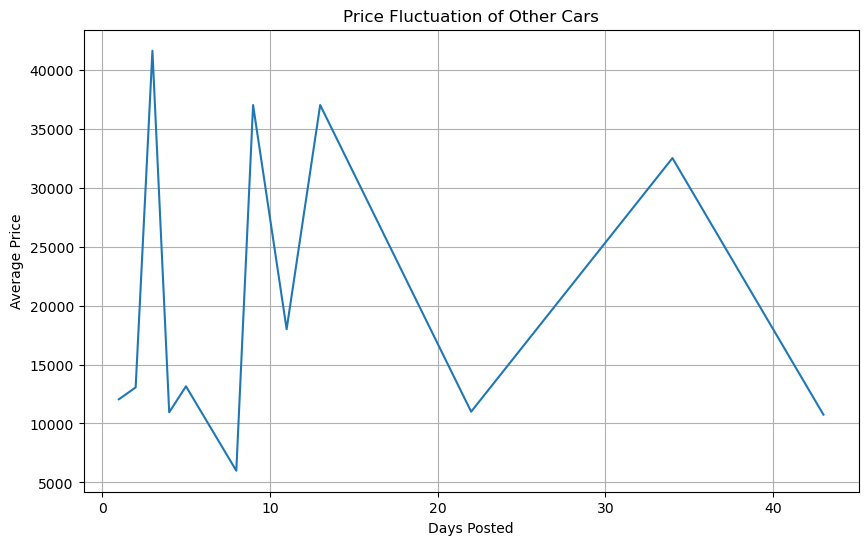

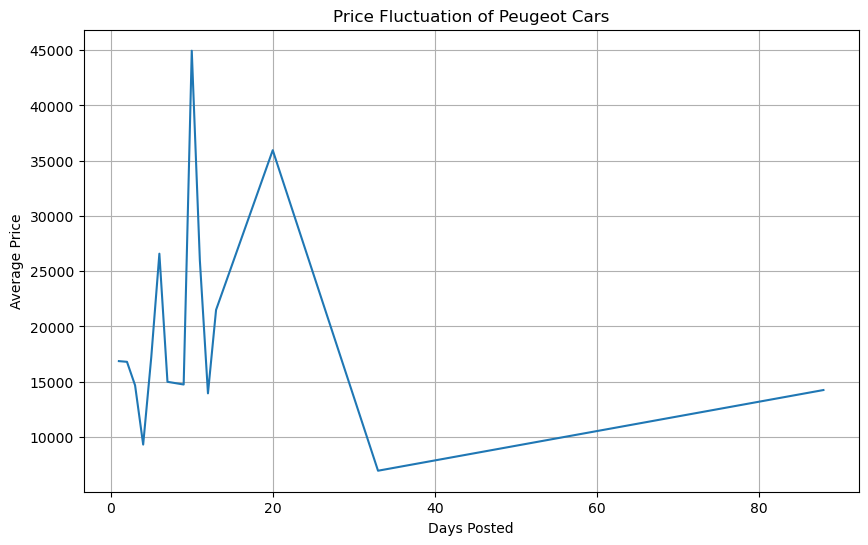

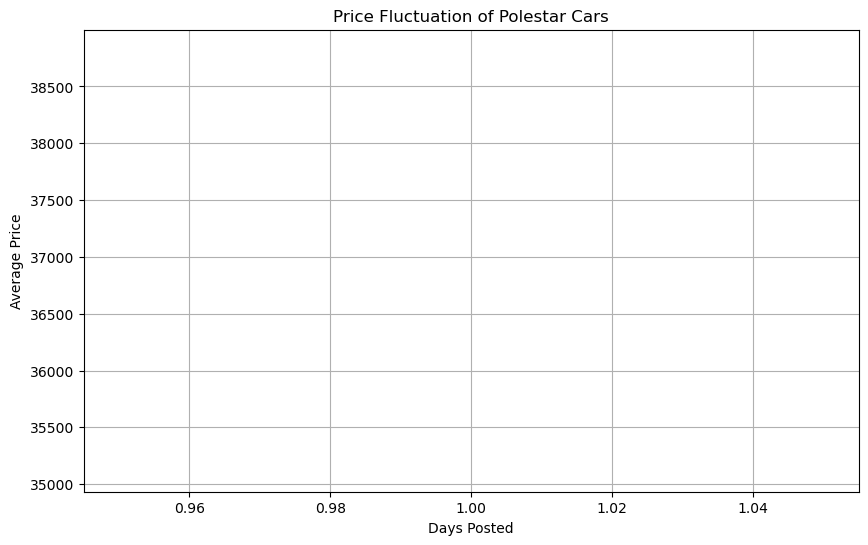

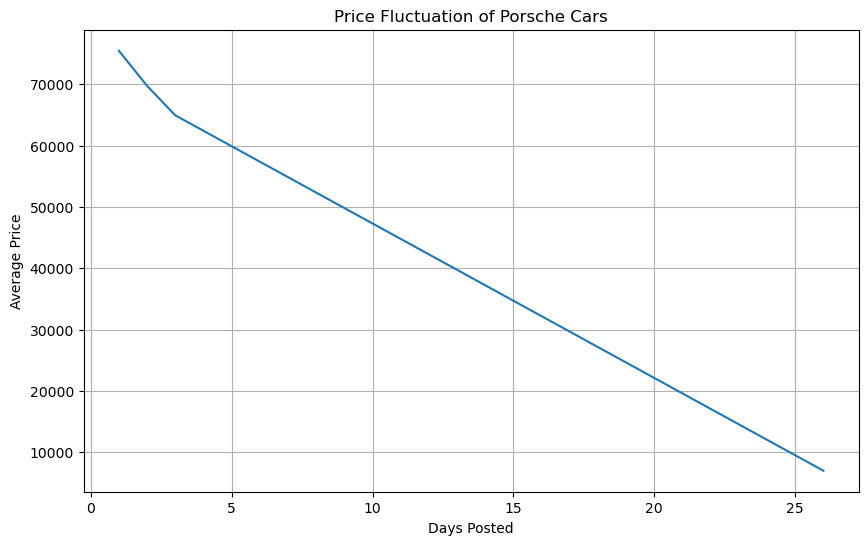

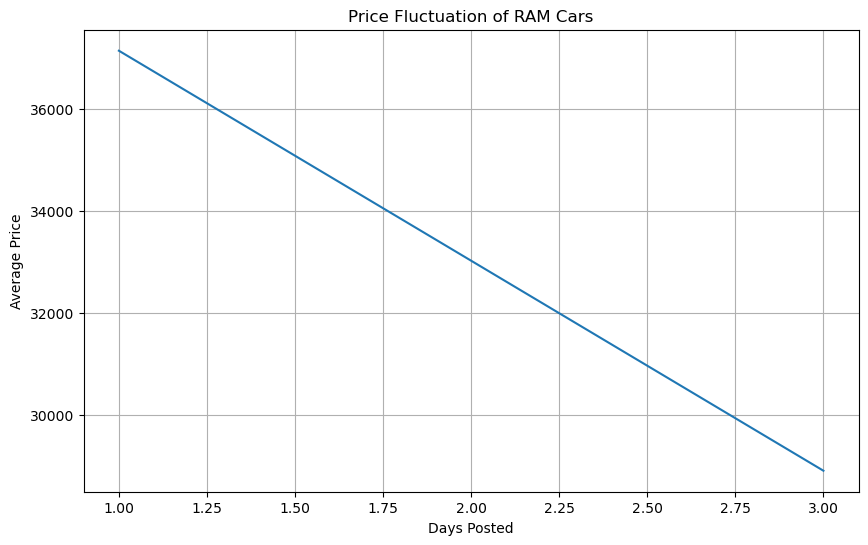

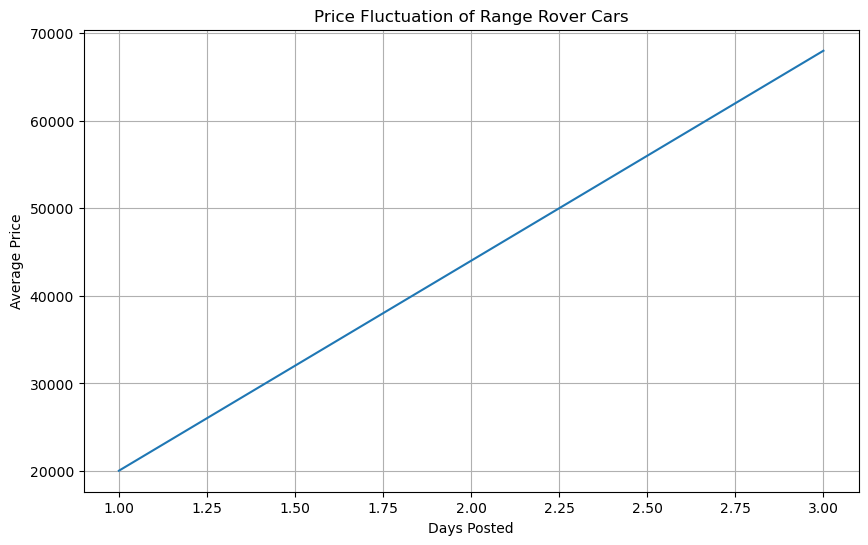

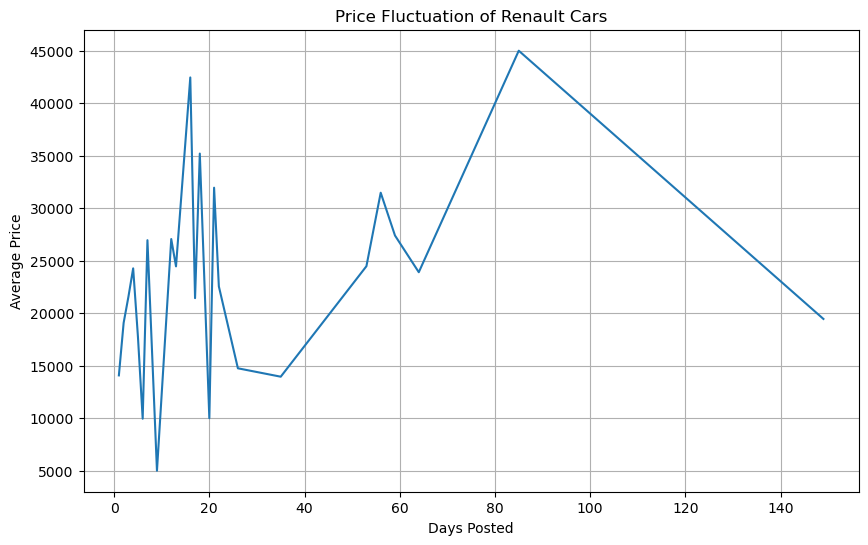

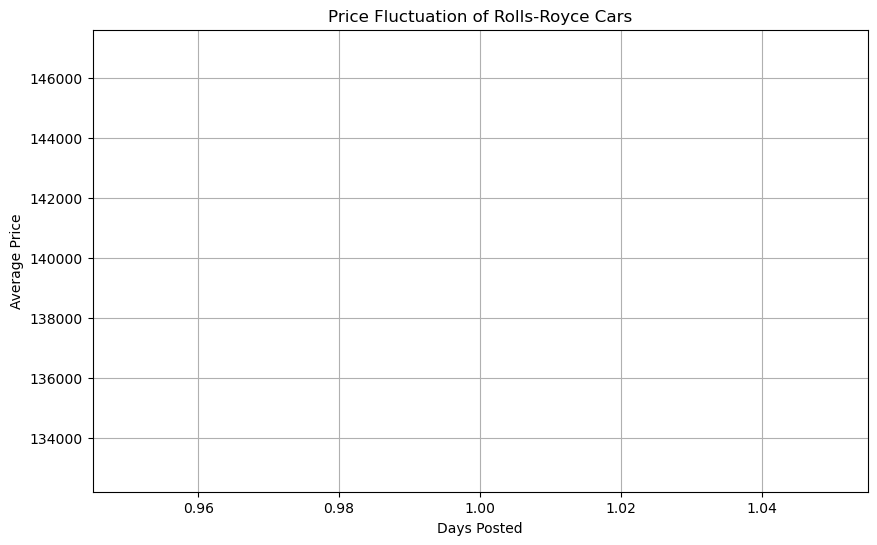

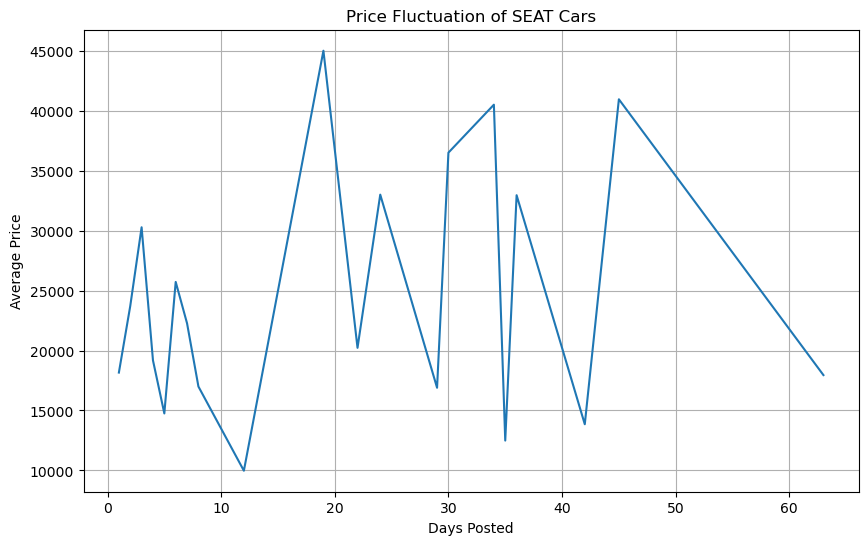

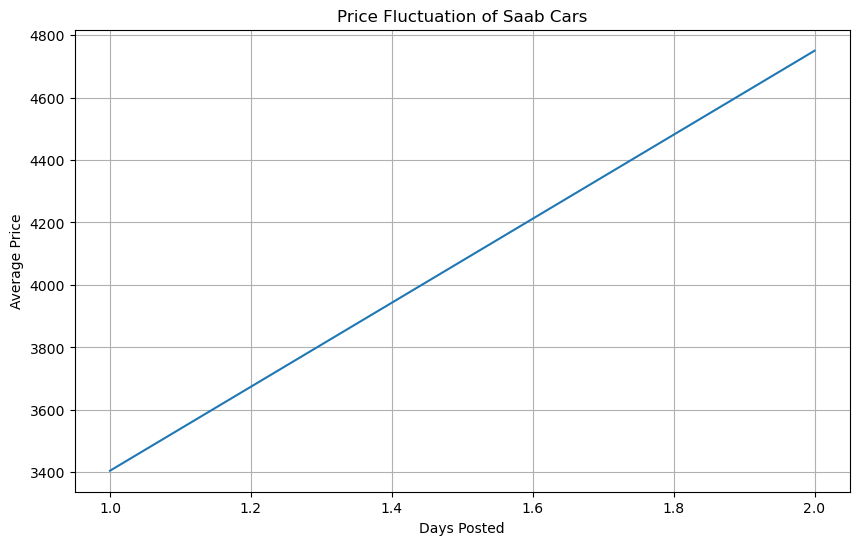

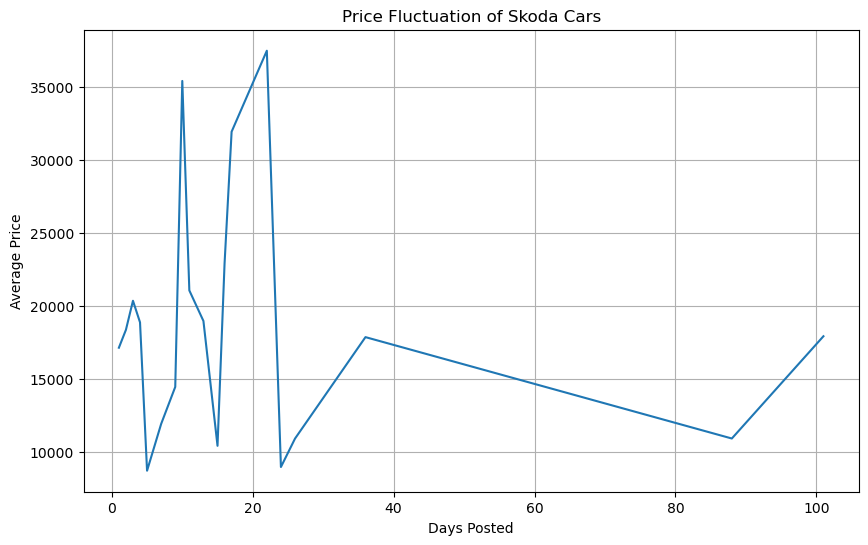

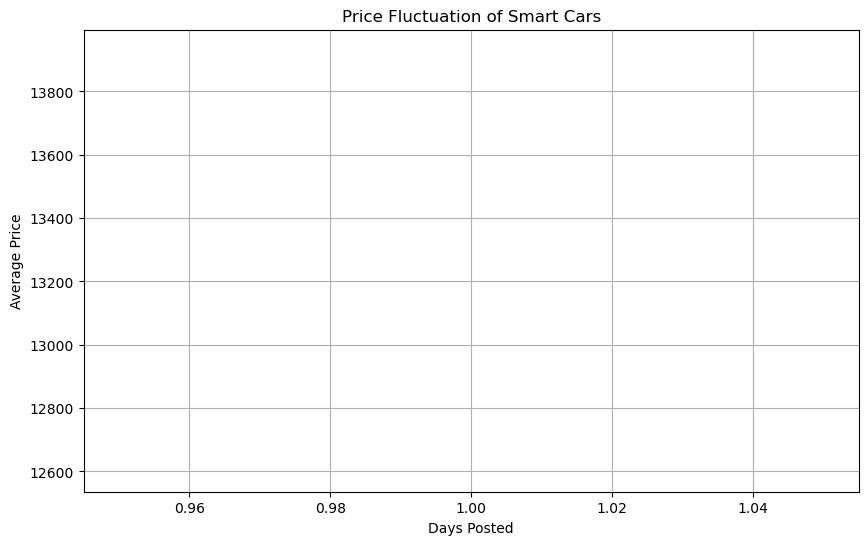

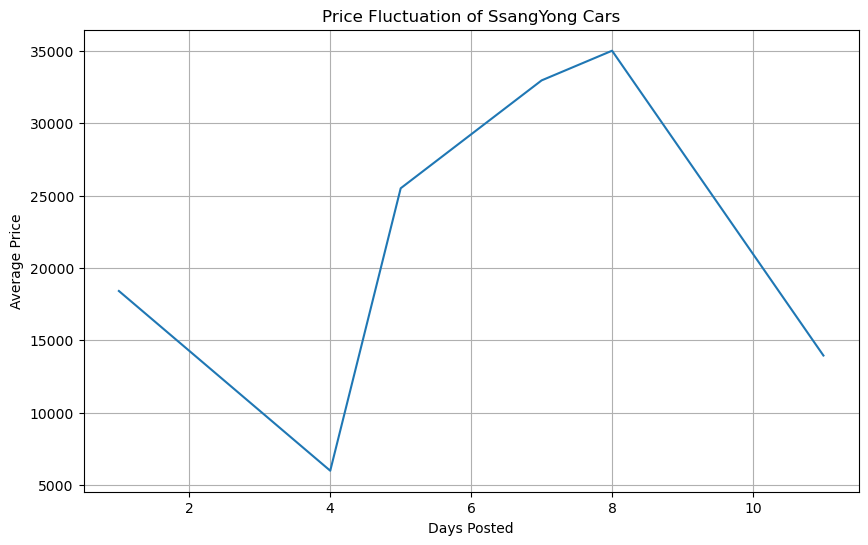

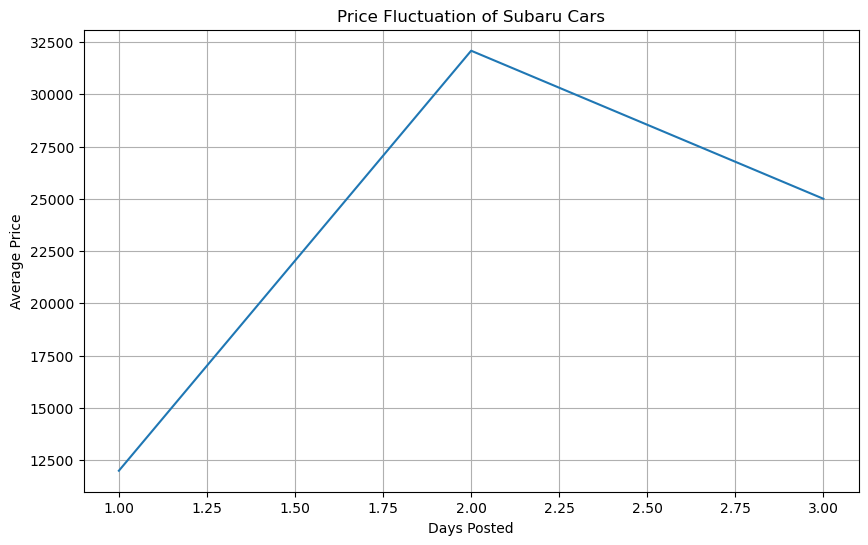

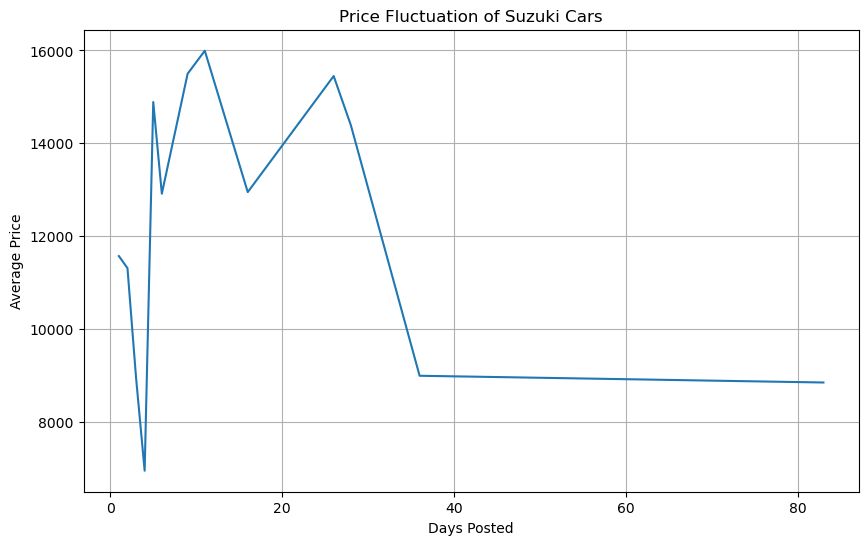

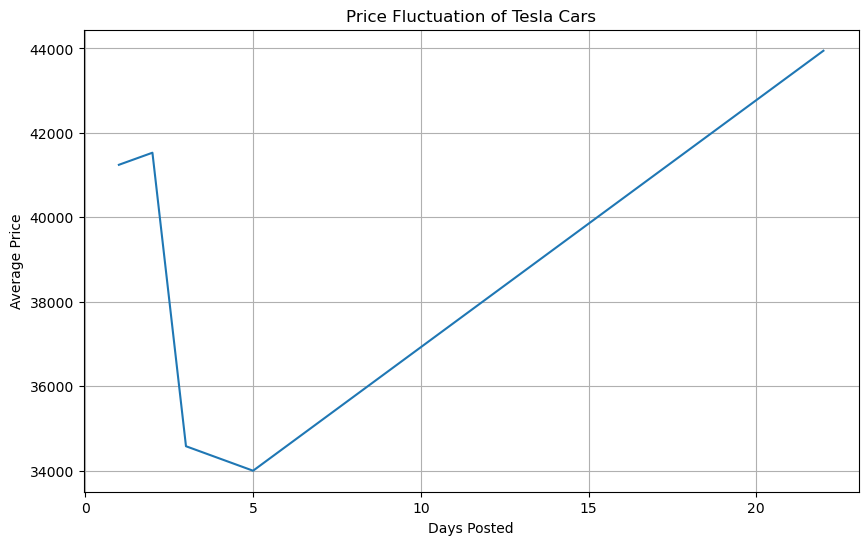

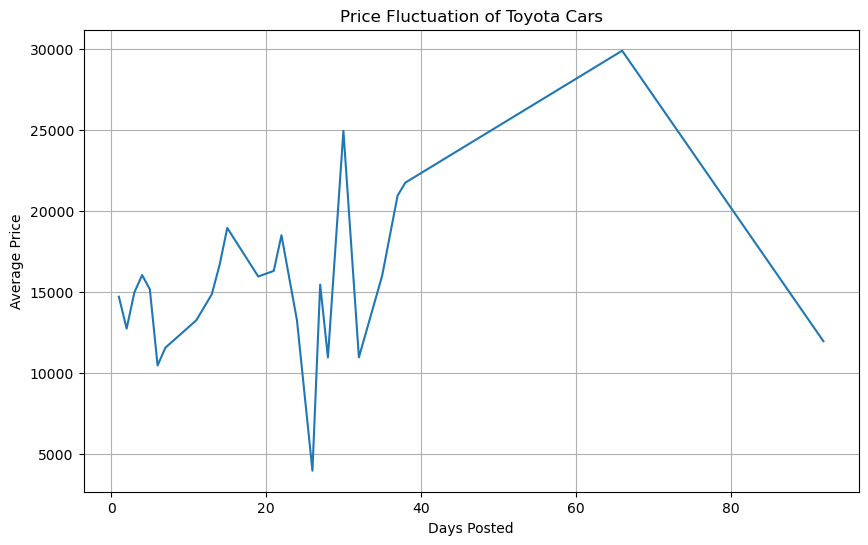

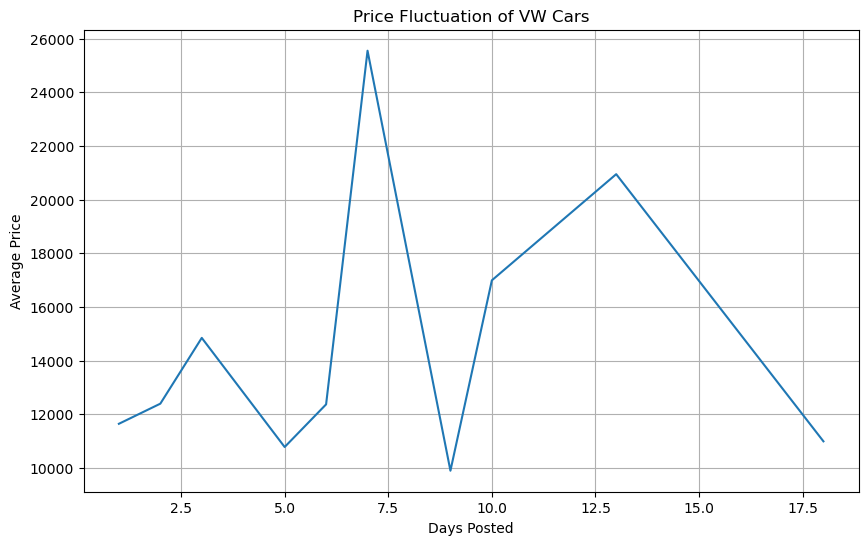

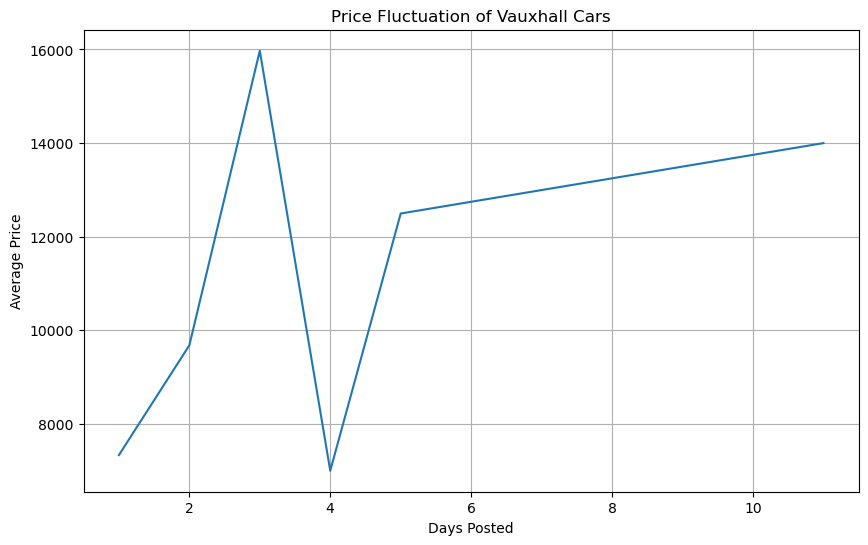

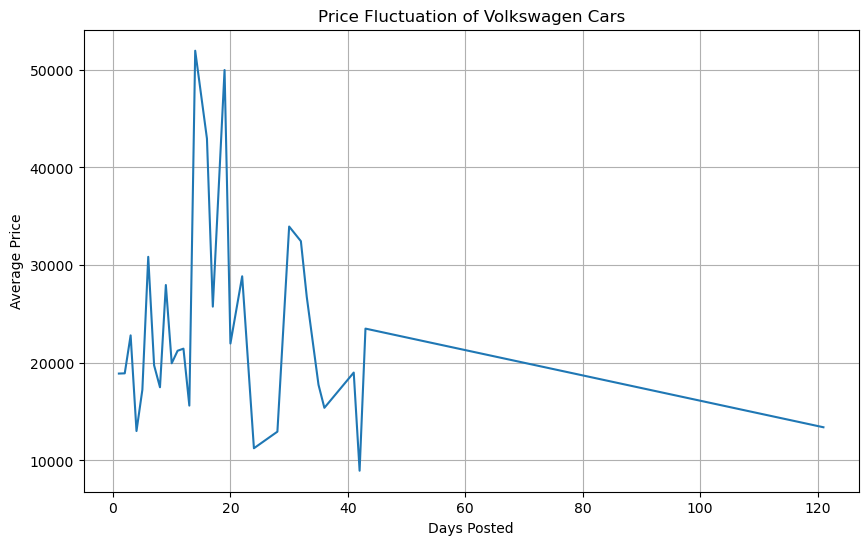

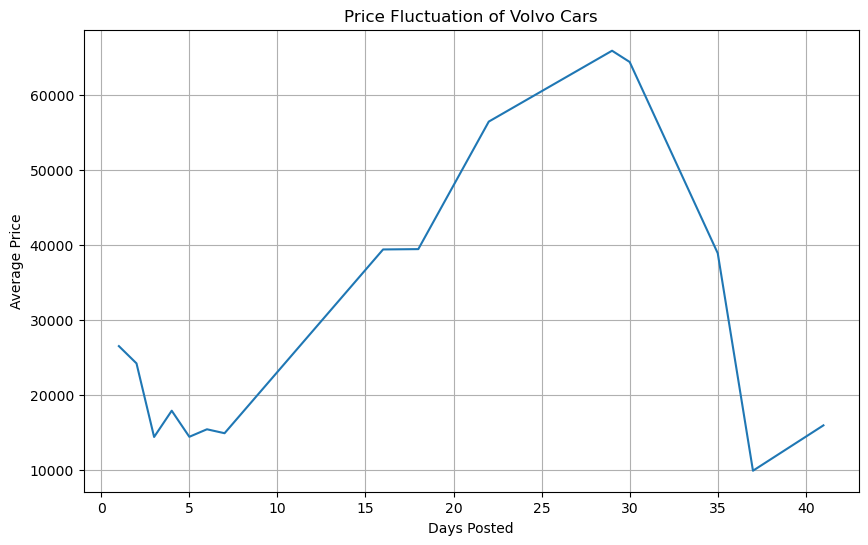

In [6]:
#Use time-series analysis to investigate the price fluctuations of cars from different brands over time.
#separate time-series plots for each car brand, showing how the average price of cars from that brand fluctuates over time. 
#By examining these plots, you can gain insights into the price trends and fluctuations for different car brands.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mac/Desktop/DoneDeal WebScraping/DoneDealCars.csv')

# Converting the 'DayPosted' column to appropriate time intervals
def convert_to_days(posted_time):
    if 'min' in posted_time:
        return 1
    elif 'day' in posted_time:
        return int(posted_time.split()[0])
    else:
        return None

df['DaysPosted'] = df['DayPosted'].apply(convert_to_days)
df = df[df['DaysPosted'].notnull()]
df = df.sort_values('DaysPosted', ascending=True)

# Time-series plot for car prices using Matplotlib
price_by_brand_and_days = df.groupby(['CarBrand', 'DaysPosted'])['Price'].mean().reset_index()

# Create separate plots for each car brand.
for brand in price_by_brand_and_days['CarBrand'].unique():
    brand_data = price_by_brand_and_days[price_by_brand_and_days['CarBrand'] == brand]
    plt.figure(figsize=(10, 6))
    plt.plot(brand_data['DaysPosted'], brand_data['Price'])
    plt.title(f'Price Fluctuation of {brand} Cars')
    plt.xlabel('Days Posted')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()
